In [73]:
#Import libraries
import os
import string
import math
import numpy as np
import matplotlib
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from numpy import *
import scipy.constants
from decimal import Decimal


if os.name == "nt":
    dirDelim = "\\"
else:
    dirDelim = "/"

# Adjust the plot line thickness, tick mark thickness, etc.
matplotlib.rcParams['axes.linewidth'] = 1.5
matplotlib.rcParams['xtick.major.size'] = 10
matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['xtick.major.size'] = 10
matplotlib.rcParams['ytick.major.width'] = 2
matplotlib.rcParams['xtick.minor.size'] = 5
matplotlib.rcParams['xtick.minor.width'] = 2
matplotlib.rcParams['xtick.minor.size'] = 5
matplotlib.rcParams['ytick.minor.width'] = 2

In [236]:
"""
FAST COOLING SHOCK BUBBLE (t=10^2)
Equations from Weaver1977: arXiv:1011.1669v3
Initial parameters from FG2012
"""
        
#alpha_FG= 0.88 #dimensionless constant
alpha_FG= 0.921 #dimensionless constant used in FG2012 paper
L_AGN= 1.0*(10.0**46.0) #erg/s = (g*cm^2/s^2)/s
nH_0= 100.0 # particles/cm^3
rho_0 = nH_0*(scipy.constants.m_p*1000.0) #g/cm^3
#****CHECK WITH PAT
rho_ISM=rho_0
vw= 30000.0*(10.0**5.0) #cm/s, was 30000.0 km/s
M_out = ((10.0**(0.0))*((1.989*(10.0**30.0))*1000.0))/(3.154*(10.0**7.0)) #g/s, was M_0/yr
c= scipy.constants.c*(100.0) #cm/s, was 300000000.0 m/s
#L_wind=(0.5)*L_AGN*(vw/c)
L_wind=(0.5)*M_out*(vw**2.0)

#For (t=10^2,10^4,10^6,10^8,10^10)

vgas_t = {}; r_t = {}
R2_t=[];Rc_t=[];R1_t=[]
vsh_t=[]
t=[]

#Calculate density for corresponding v at (t=10^2,10^4,10^6,10^8,10^10)
p_t={}

for i in range(4):
    
    t.append((10.0**(2.0*(i+1)))*(3.154*(10.0**7.0))) #s, was 10^2 yr < t < 10^9 yr
    
    #Calculate radius of shock bubble features based on t
    R2_t.append(alpha_FG*((L_wind*(t[i]**3.0))/rho_0)**0.2)
    Rc_t.append(0.86*R2_t[i])
    R1_t.append(((44.0/25.0)**(0.5))*((16.0/15.0)**(0.75))*((Rc_t[i]**1.5)/((vw*t[i])**0.5)))
    
    #Calculate the velocity of the shock based on the time derivative of R2
    vsh_t.append((3.0/5.0)*alpha_FG*((L_wind)/(rho_0*(t[i]**2.0)))**0.2)

    num= 10000
    radius = np.linspace(10.0**(17.0),R2_t[i],num) #cm, was 10^-1 pc < R < 10^4 pc
    vgas=[]; p=[]

    #Calculate vgas and density in different regions of shock bubble
    for r in radius:
        if r<R1_t[i]:
            vg=vw
            vgas.append(vg)
            p.append(M_out/(4.0*np.pi*(r**2.0)*vg))
            
            if i == 2:
                TEST_y1 = (M_out/(np.pi*(r**2.0)*vw))/(scipy.constants.m_p*1000.0) #This is what FG assumes
                
                t_prime = t[i]*((1-((r**3.0)/(Rc_t[i]**3.0)))**(25.0/33.0))
                Rc_prime =(0.86*alpha_FG*((L_wind*(t_prime**3.0))/rho_0)**0.2)
                TEST_y2 = (25.0/11.0)*t_prime*(M_out/(4.0*np.pi*(Rc_prime**3.0)))/(scipy.constants.m_p*1000.0)
                
                TEST_y3 = (0.628*(((M_out**2.0)*(rho_0**3.0)*(vw**(-6.0)))**(1.0/5.0))*(t[i]**(-4.0/5.0))*((1-((r**3.0)/(Rc_t[i]**3.0)))**(-8.0/33.0)))/(scipy.constants.m_p*1000.0)
                
                TEST_x=r/(3.086*(10.0**18))
                
        elif r==R1_t[i]:
            vg=vw/4.0
            vgas.append(vg)
            p.append(M_out/(np.pi*(r**2.0)*vg))
        elif R1_t[i]<r<Rc_t[i]:
            vg=(11.0/25.0)*((Rc_t[i]**3.0)/((r**2.0)*t[i]))+(4.0/25.0)*(r/t[i])
            #vgas.append((vw/4.0)*((R1_t[i]/r)**2.0))
            vgas.append(vg)
            
            #p.append((M_out/(np.pi*(r**2.0)*vg))*((16.0/15.0)**(3.0/2.0)))
            #t_prime = t[i]*((1-((r**3.0)/(Rc_t[i]**3.0)))**(25.0/33.0))
            #Rc_prime =(0.86*alpha_FG*((L_wind*(t_prime**3.0))/rho_0)**0.2)
            #p.append((25.0/11.0)*t_prime*(M_out/(4.0*np.pi*(Rc_prime**3.0)))*((t_prime/t[i])**(12.0/25.0)))
            p.append(0.628*(((M_out**2.0)*(rho_0**3.0)*(vw**-6.0))**0.2)*(t[i]**-0.8)*((1-((r**3.0)/(Rc_t[i]**3.0)))**(-8.0/33.0)))
            
        elif r==Rc_t[i]:
            vg=0.86*vsh_t[i]
            vgas.append(vg)
            p.append(0.4*4.0*rho_ISM)
        elif Rc_t[i]<r<R2_t[i]:
            #Assuming linear
            vg=(vsh_t[i]/(Rc_t[i]-R2_t[i]))*((0.11*r)+(0.75*Rc_t[i])-(0.86*R2_t[i]))
            vgas.append(vg)
            p.append((rho_ISM/(Rc_t[i]-R2_t[i]))*((-2.4*r)+(4.0*Rc_t[i])-(1.6*R2_t[i])))
        elif r==R2_t[i]:
            vg=0.75*vsh_t[i]
            vgas.append(vg)
            p.append(4.0*rho_ISM)
        else:
            vg=0.0
            vgas.append(vg)
            p.append(rho_ISM)

    
    #Convert t from s to yrs, R from cm to pc, and vgas from cm/s to km/s
    t[i]=t[i]/(3.154*(10.0**7.0))
    R1_t[i]= R1_t[i]/(3.086*(10.0**18)); Rc_t[i]= Rc_t[i]/(3.086*(10.0**18)); R2_t[i]= R2_t[i]/(3.086*(10.0**18))

    for j in range(0,len(radius)):
        radius[j]= radius[j]/(3.086*(10.0**18))
        vgas[j]=vgas[j]/(10.0**5.0)
        p[j]=p[j]/(scipy.constants.m_p*1000.0)
            
    vgas_t[i+1] = vgas
    r_t[i+1] = radius
    p_t[i+1] = p

print(TEST_y1)
print(TEST_y2)
print(TEST_y3)
print(TEST_y3/TEST_y2)

0.036221624682767566
0.040030712266132
0.04545625444970305
1.1355344903058677


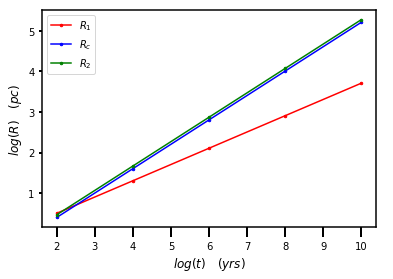

In [47]:
#Plot R1, R2, snd Rc vs time
plt.plot(np.log10(t),np.log10(R1_t),color='red',linestyle="-",marker='.',markersize=5,label=r'$R_1$')
plt.plot(np.log10(t),np.log10(Rc_t),color='blue',linestyle="-",marker='.',markersize=5,label=r'$R_c$')
plt.plot(np.log10(t),np.log10(R2_t),color='green',linestyle="-",marker='.',markersize=5,label=r'$R_2$')
plt.legend(loc='upper left')
plt.ylabel(r'$log(R) \quad (pc)$', fontsize=12)
plt.xlabel(r'$log(t) \quad (yrs)$', fontsize=12)
plt.savefig('WeaverShockBubble_logRVSlogt.png',bbox_inches='tight')
plt.show()

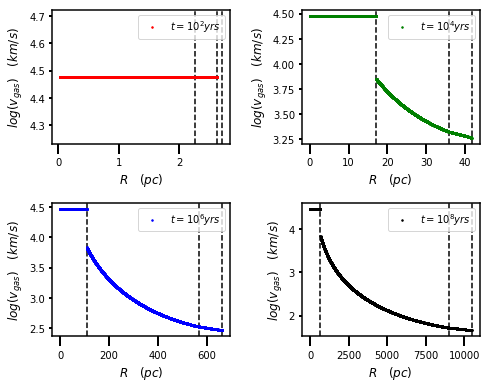

In [240]:
#---Place four plots in a 2 x 2 array
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 5.5))
#---t=10^2yr
#Plot log(v_gas) vs R for set time
axes[0,0].axvline(x=R1_t[0],color='black',linestyle="--")
axes[0,0].axvline(x=Rc_t[0],color='black',linestyle="--")
axes[0,0].axvline(x=R2_t[0],color='black',linestyle="--")
axes[0,0].plot((r_t[1]),np.log10(vgas_t[1]),color='red',linestyle="",marker='.',markersize=3,label=r'$t=10^{2} yrs$')
axes[0,0].set_ylabel(r'$log(v_{gas}) \quad (km/s)$', fontsize=12)
axes[0,0].set_xlabel(r'$R \quad (pc)$', fontsize=12)
axes[0,0].legend(loc='upper right')
#---t=10^4yr
axes[0,1].axvline(x=R1_t[1],color='black',linestyle="--")
axes[0,1].axvline(x=Rc_t[1],color='black',linestyle="--")
axes[0,1].axvline(x=R2_t[1],color='black',linestyle="--")
axes[0,1].plot((r_t[2]),np.log10(vgas_t[2]),color='green',linestyle="",marker='.',markersize=3,label=r'$t=10^{4} yrs$')
axes[0,1].set_ylabel(r'$log(v_{gas}) \quad (km/s)$', fontsize=12)
axes[0,1].set_xlabel(r'$R \quad (pc)$', fontsize=12)
axes[0,1].legend(loc='upper right')
#---t=10^6yr
axes[1,0].axvline(x=R1_t[2],color='black',linestyle="--")
axes[1,0].axvline(x=Rc_t[2],color='black',linestyle="--")
axes[1,0].axvline(x=R2_t[2],color='black',linestyle="--")
axes[1,0].plot((r_t[3]),np.log10(vgas_t[3]),color='blue',linestyle="",marker='.',markersize=3,label=r'$t=10^{6} yrs$')
axes[1,0].set_ylabel(r'$log(v_{gas}) \quad (km/s)$', fontsize=12)
axes[1,0].set_xlabel(r'$R \quad (pc)$', fontsize=12)
axes[1,0].legend(loc='upper right')
#---t=10^8yr
axes[1,1].axvline(x=R1_t[3],color='black',linestyle="--")
axes[1,1].axvline(x=Rc_t[3],color='black',linestyle="--")
axes[1,1].axvline(x=R2_t[3],color='black',linestyle="--")
axes[1,1].plot((r_t[4]),np.log10(vgas_t[4]),color='black',linestyle="",marker='.',markersize=3,label=r'$t=10^{8} yrs$')
axes[1,1].set_ylabel(r'$log(v_{gas}) \quad (km/s)$', fontsize=12)
axes[1,1].set_xlabel(r'$R \quad (pc)$', fontsize=12)
axes[1,1].legend(loc='upper right')

plt.tight_layout()
plt.savefig('WeaverShockBubble_logvgasVSr_subplots.png',bbox_inches='tight')
plt.show()

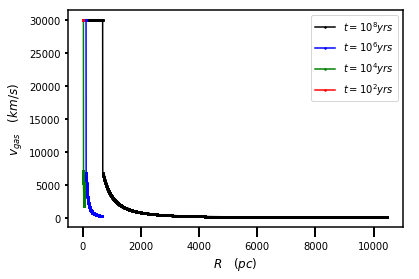

In [241]:
#Plot v_gas vs r for different t steps
plt.plot((r_t[4]),(vgas_t[4]),color='black',linestyle="-",marker='.',markersize=3,label=r'$t=10^{8} yrs$')
plt.plot((r_t[3]),(vgas_t[3]),color='blue',linestyle="-",marker='.',markersize=3,label=r'$t=10^{6} yrs$')
plt.plot((r_t[2]),(vgas_t[2]),color='green',linestyle="-",marker='.',markersize=3,label=r'$t=10^{4} yrs$')
plt.plot((r_t[1]),(vgas_t[1]),color='red',linestyle="-",marker='.',markersize=3,label=r'$t=10^{2} yrs$')
plt.legend(loc='upper right')
plt.ylabel(r'$v_{gas} \quad (km/s)$', fontsize=12)
plt.xlabel(r'$R \quad (pc)$', fontsize=12)
plt.savefig('WeaverShockBubble_vgasVSr_t10^2-10^8.png',bbox_inches='tight')
plt.show()

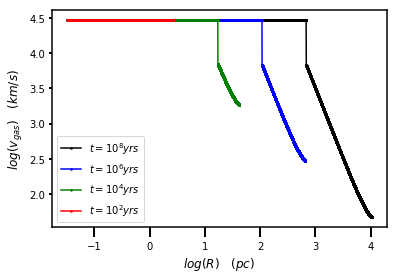

In [242]:
#Plot log(v_gas) vs log(r) for different t steps
plt.plot(np.log10(r_t[4]),np.log10(vgas_t[4]),color='black',linestyle="-",marker='.',markersize=3,label=r'$t=10^{8} yrs$')
plt.plot(np.log10(r_t[3]),np.log10(vgas_t[3]),color='blue',linestyle="-",marker='.',markersize=3,label=r'$t=10^{6} yrs$')
plt.plot(np.log10(r_t[2]),np.log10(vgas_t[2]),color='green',linestyle="-",marker='.',markersize=3,label=r'$t=10^{4} yrs$')
plt.plot(np.log10(r_t[1]),np.log10(vgas_t[1]),color='red',linestyle="-",marker='.',markersize=3,label=r'$t=10^{2} yrs$')
plt.legend(loc='lower left')
plt.ylabel(r'$log(v_{gas}) \quad (km/s)$', fontsize=12)
plt.xlabel(r'$log(R) \quad (pc)$', fontsize=12)
plt.savefig('WeaverShockBubble_logvgasVSlogr_t10^2-10^8.png',bbox_inches='tight')
plt.show()

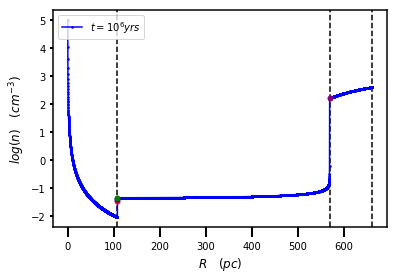

In [243]:
#Plot log(n) vs R plot for different t steps
plt.axvline(x=R1_t[2],color='black',linestyle="--")
plt.axvline(x=Rc_t[2],color='black',linestyle="--")
plt.axvline(x=R2_t[2],color='black',linestyle="--")
plt.plot((r_t[3]),np.log10(p_t[3]),color='blue',linestyle="-",marker='.',markersize=3,label=r'$t=10^{6} yrs$')
plt.plot(TEST_x,np.log10(TEST_y1),color='red',linestyle="-",marker='.',markersize=10)
plt.plot(TEST_x,np.log10(TEST_y2),color='blue',linestyle="-",marker='.',markersize=10)
plt.plot(TEST_x,np.log10(TEST_y3),color='green',linestyle="-",marker='.',markersize=10)
plt.plot(Rc_t[2],np.log10(1.6*rho_ISM/(scipy.constants.m_p*1000.0)),color='purple',linestyle="-",marker='.',markersize=10)
plt.legend(loc='upper left')
plt.ylabel(r'$log(n) \quad (cm^{-3})$', fontsize=12)
plt.xlabel(r'$R \quad (pc)$', fontsize=12)
#plt.xlim(0,2000)
#plt.ylim(-10,-4)
plt.savefig('WeaverShockBubble_lognVSr_eq16_t10^6.png',bbox_inches='tight')
plt.show()

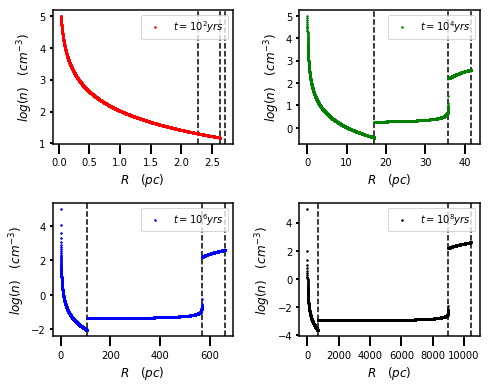

In [246]:
#---Place four plots in a 2 x 2 array
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 5.5))
#---t=10^2yr
#Plot log(v_gas) vs R for set time
axes[0,0].axvline(x=R1_t[0],color='black',linestyle="--")
axes[0,0].axvline(x=Rc_t[0],color='black',linestyle="--")
axes[0,0].axvline(x=R2_t[0],color='black',linestyle="--")
axes[0,0].plot((r_t[1]),np.log10(p_t[1]),color='red',linestyle="",marker='.',markersize=3,label=r'$t=10^{2} yrs$')
axes[0,0].set_ylabel(r'$log(n) \quad (cm^{-3})$', fontsize=12)
axes[0,0].set_xlabel(r'$R \quad (pc)$', fontsize=12)
axes[0,0].legend(loc='upper right')
#---t=10^4yr
axes[0,1].axvline(x=R1_t[1],color='black',linestyle="--")
axes[0,1].axvline(x=Rc_t[1],color='black',linestyle="--")
axes[0,1].axvline(x=R2_t[1],color='black',linestyle="--")
axes[0,1].plot((r_t[2]),np.log10(p_t[2]),color='green',linestyle="",marker='.',markersize=3,label=r'$t=10^{4} yrs$')
axes[0,1].set_ylabel(r'$log(n) \quad (cm^{-3})$', fontsize=12)
axes[0,1].set_xlabel(r'$R \quad (pc)$', fontsize=12)
axes[0,1].legend(loc='upper right')
#---t=10^6yr
axes[1,0].axvline(x=R1_t[2],color='black',linestyle="--")
axes[1,0].axvline(x=Rc_t[2],color='black',linestyle="--")
axes[1,0].axvline(x=R2_t[2],color='black',linestyle="--")
axes[1,0].plot((r_t[3]),np.log10(p_t[3]),color='blue',linestyle="",marker='.',markersize=3,label=r'$t=10^{6} yrs$')
axes[1,0].set_ylabel(r'$log(n) \quad (cm^{-3})$', fontsize=12)
axes[1,0].set_xlabel(r'$R \quad (pc)$', fontsize=12)
axes[1,0].legend(loc='upper right')
#---t=10^8yr
axes[1,1].axvline(x=R1_t[3],color='black',linestyle="--")
axes[1,1].axvline(x=Rc_t[3],color='black',linestyle="--")
axes[1,1].axvline(x=R2_t[3],color='black',linestyle="--")
axes[1,1].plot((r_t[4]),np.log10(p_t[4]),color='black',linestyle="",marker='.',markersize=3,label=r'$t=10^{8} yrs$')
axes[1,1].set_ylabel(r'$log(n) \quad (cm^{-3})$', fontsize=12)
axes[1,1].set_xlabel(r'$R \quad (pc)$', fontsize=12)
axes[1,1].legend(loc='upper right')

plt.tight_layout()
plt.savefig('WeaverShockBubble_lognVSr_subplots.png',bbox_inches='tight')
plt.show()

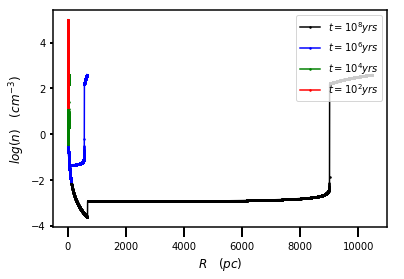

In [244]:
#Plot log(n) vs R plot for different t steps
plt.plot((r_t[4]),np.log10(p_t[4]),color='black',linestyle="-",marker='.',markersize=3,label=r'$t=10^{8} yrs$')
plt.plot((r_t[3]),np.log10(p_t[3]),color='blue',linestyle="-",marker='.',markersize=3,label=r'$t=10^{6} yrs$')
plt.plot((r_t[2]),np.log10(p_t[2]),color='green',linestyle="-",marker='.',markersize=3,label=r'$t=10^{4} yrs$')
plt.plot((r_t[1]),np.log10(p_t[1]),color='red',linestyle="-",marker='.',markersize=3,label=r'$t=10^{2} yrs$')
plt.legend(loc='upper right')
plt.ylabel(r'$log(n) \quad (cm^{-3})$', fontsize=12)
plt.xlabel(r'$R \quad (pc)$', fontsize=12)
plt.savefig('WeaverShockBubble_lognVSr_eq16_t10^2-10^8.png',bbox_inches='tight')
plt.show()

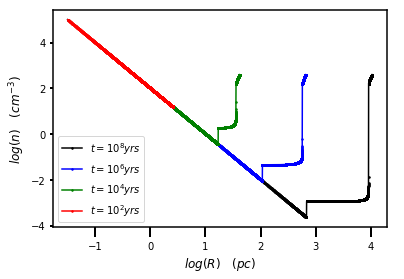

In [245]:
#Plot log(n) vs R plot for different t steps
plt.plot(np.log10(r_t[4]),np.log10(p_t[4]),color='black',linestyle="-",marker='.',markersize=3,label=r'$t=10^{8} yrs$')
plt.plot(np.log10(r_t[3]),np.log10(p_t[3]),color='blue',linestyle="-",marker='.',markersize=3,label=r'$t=10^{6} yrs$')
plt.plot(np.log10(r_t[2]),np.log10(p_t[2]),color='green',linestyle="-",marker='.',markersize=3,label=r'$t=10^{4} yrs$')
plt.plot(np.log10(r_t[1]),np.log10(p_t[1]),color='red',linestyle="-",marker='.',markersize=3,label=r'$t=10^{2} yrs$')
plt.legend(loc='lower left')
plt.ylabel(r'$log(n) \quad (cm^{-3})$', fontsize=12)
plt.xlabel(r'$log(R) \quad (pc)$', fontsize=12)
plt.savefig('WeaverShockBubble_lognVSlogr_eq16_t10^2-10^8.png',bbox_inches='tight')
plt.show()